In [1]:
from keras.datasets import mnist
from keras.layers import Flatten, Conv2D, MaxPool2D, Dense, merge, Input, GlobalAveragePooling2D
from keras.models import Sequential, Model
from keras.optimizers import SGD
from keras.utils import to_categorical

import matplotlib.pyplot as plt

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#数据变成TensorFow为Backend的形式
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
#把标签变成one-hot编码的形式
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [6]:
def fire_model(x, s_1x1, e_1x1, e_3x3, fire_name):
    # squeeze part
    squeeze_x = Conv2D(kernel_size=(1,1),filters=s_1x1,padding='same',activation='relu',name=fire_name+'_s1')(x)
    # expand part
    expand_x_1 = Conv2D(kernel_size=(1,1),filters=e_1x1,padding='same',activation='relu',name=fire_name+'_e1')(squeeze_x)
    expand_x_3 = Conv2D(kernel_size=(3,3),filters=e_3x3,padding='same',activation='relu',name=fire_name+'_e3')(squeeze_x)
    expand = merge([expand_x_1, expand_x_3], mode='concat', concat_axis=3)
    return expand

In [7]:
def squeezeNet(x):
    conv1 = Conv2D(input_shape = (224,224,3), strides = 2, filters=96, kernel_size=(7,7), padding='same', activation='relu')(x)
    poo1 = MaxPool2D((2,2))(conv1)
    fire2 = fire_model(poo1, 16, 64, 64,'fire2')
    fire3 = fire_model(fire2, 16, 64, 64,'fire3')
    fire4 = fire_model(fire3, 32, 128, 128,'fire4')
    pool2 = MaxPool2D((2,2))(fire4)
    fire5 = fire_model(pool2, 32, 128, 128,'fire5')
    fire6 = fire_model(fire5, 48, 192, 192,'fire6')
    fire7 = fire_model(fire6, 48, 192, 192,'fire7')
    fire8 = fire_model(fire7, 64, 256, 256,'fire8')
    pool3 = MaxPool2D((2,2))(fire8)
    fire9 = fire_model(pool3, 64, 256, 256,'fire9')
    conv10 = Conv2D(kernel_size=(1,1), filters=1000, padding='same', activation='relu')(fire9)
    gap = GlobalAveragePooling2D()(conv10)
#     score = Dense(10, activation='softmax')
    return gap

In [8]:
input_img = Input(shape = (224,224,3))
squeeze_net_model = Model(input_img,squeezeNet(input_img))
squeeze_net_model.summary()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  import sys
/usr/local/lib/python3.6/site-packages/keras/legacy/layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 112, 112, 96) 14208       input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 56, 56, 96)   0           conv2d_3[0][0]                   
__________________________________________________________________________________________________
fire2_s1 (Conv2D)               (None, 56, 56, 16)   1552        max_pooling2d_4[0][0]            
__________________________________________________________________________________________________
fire2_e1 (

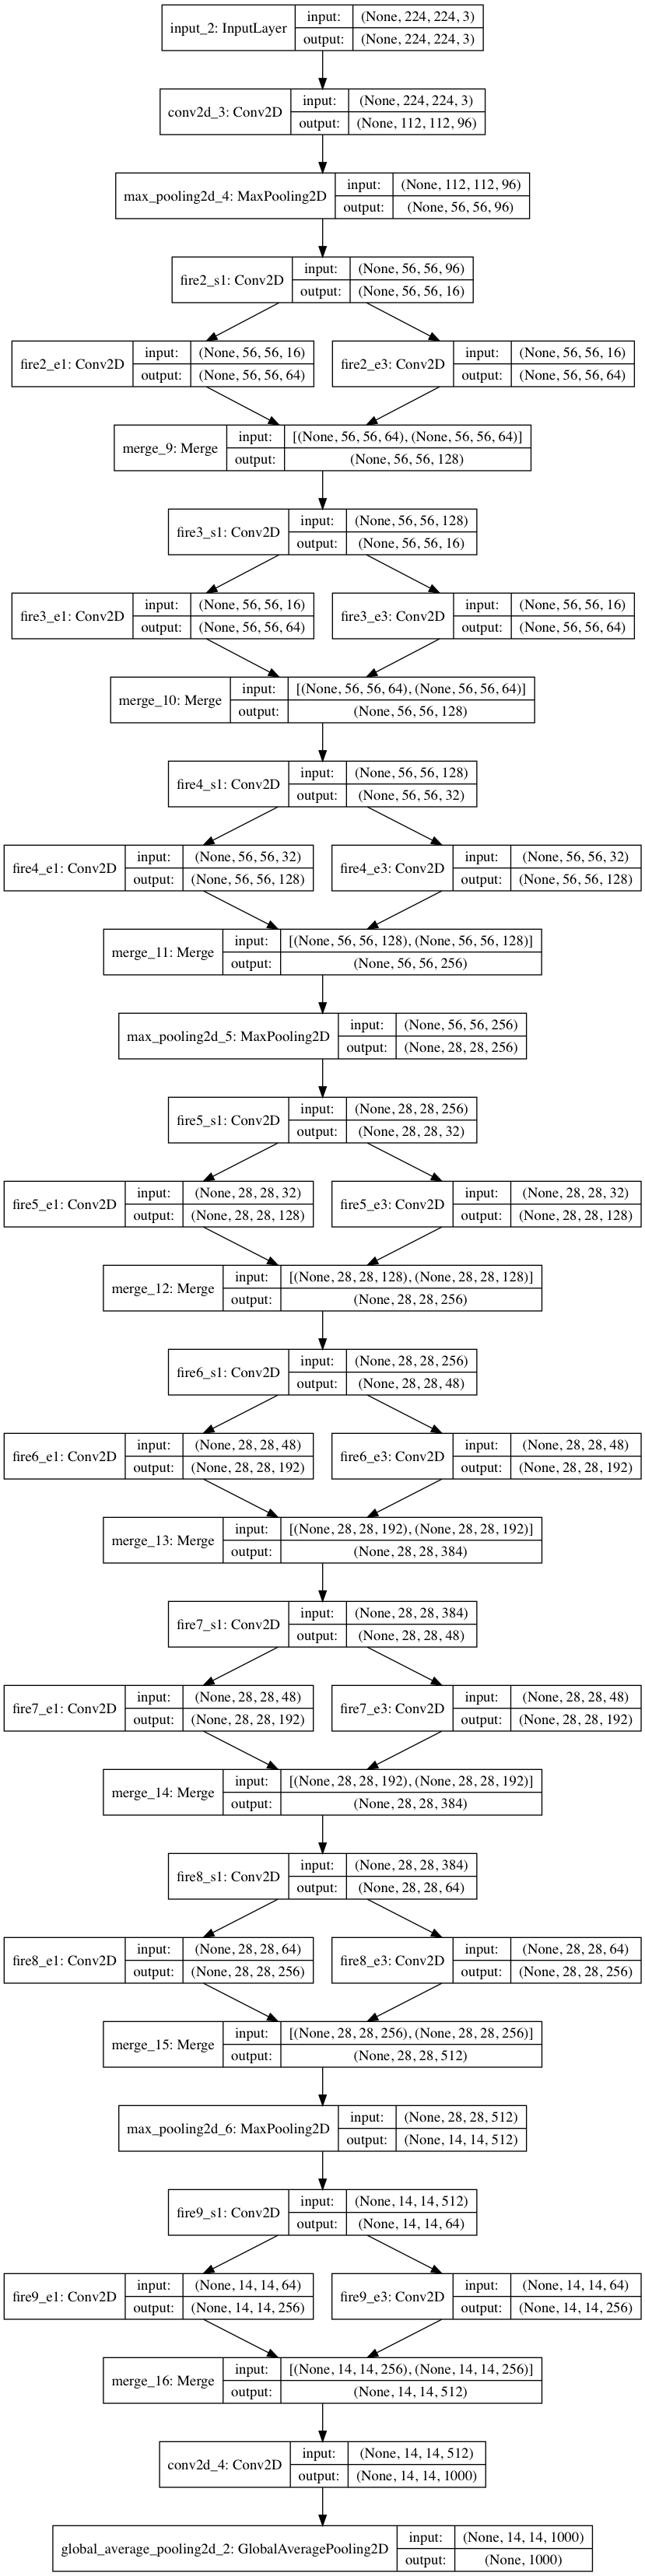

In [9]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image

plot_model(squeeze_net_model, to_file="squeeze_net.png", show_shapes=True)

Image('squeeze_net.png')